In [552]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

df = pd.read_csv("diabetes.csv")

display(df.describe())
display(df.columns)

# Gerekli kütüphaneler yüklendi ve veri seti hakkında fikir edinildi.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [553]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop(["Outcome", "DiabetesPedigreeFunction", "Pregnancies"])
print(numeric_cols)

df[numeric_cols] = df[numeric_cols].replace(0, np.nan)

imputer = SimpleImputer(strategy="mean")
df[numeric_cols[0:2]] = imputer.fit_transform(df[numeric_cols[0:2]])

imputer = SimpleImputer(strategy="median")
df[numeric_cols[2:4]] = imputer.fit_transform(df[numeric_cols[2:4]])

knn_imputer = KNNImputer(n_neighbors=5)
df[numeric_cols[4:6]] = knn_imputer.fit_transform(df[numeric_cols[4:6]])

display(df.describe())

# Veri setindeki 0 değerleri NaN değerine çevirildi ve eksik değerler farklı yöntemler kullanılarak dolduruldu.


Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'], dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.493516,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.897753,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [554]:
df["Sağlık Risk Skoru"] = df["BMI"] * df["Glucose"] / 100
df["İnsülin Direnç Değeri"] = (df["Insulin"] * df["Glucose"]) / 405 

df["Kan Basıncı Kategorisi"] = np.nan

df.loc[(df["SkinThickness"] <= 30) & (df["BloodPressure"] < 80), "Kan Basıncı Kategorisi"] = 0
df.loc[((df["SkinThickness"] < 30) & (df["BloodPressure"] >=80)) | ((df["SkinThickness"]> 30) & (df["BloodPressure"] <80)), "Kan Basıncı Kategorisi"] = 1
df.loc[(df["SkinThickness"] >= 30) & (df["BloodPressure"]>= 80), "Kan Basıncı Kategorisi"] = 2
df["Kan Basıncı Kategorisi"] = df["Kan Basıncı Kategorisi"].astype(int)
df["Kan Basıncı Kategorisi"] = df["Kan Basıncı Kategorisi"].astype("category")
print(df["Kan Basıncı Kategorisi"].isna().sum())

display(df)

# Yeni özellikler oluşturuldu ve kategorik bir özellik oluşturuldu.

0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sağlık Risk Skoru,İnsülin Direnç Değeri,Kan Basıncı Kategorisi
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1,49.728,45.679012,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0,22.610,26.234568,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1,42.639,56.481481,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,25.009,20.656790,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,59.047,56.829630,1
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0,33.229,44.888889,1
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0,44.896,37.654321,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0,31.702,33.461728,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1,37.926,38.888889,0


Text(0, 0.5, 'İnsülin Direnç Değeri')

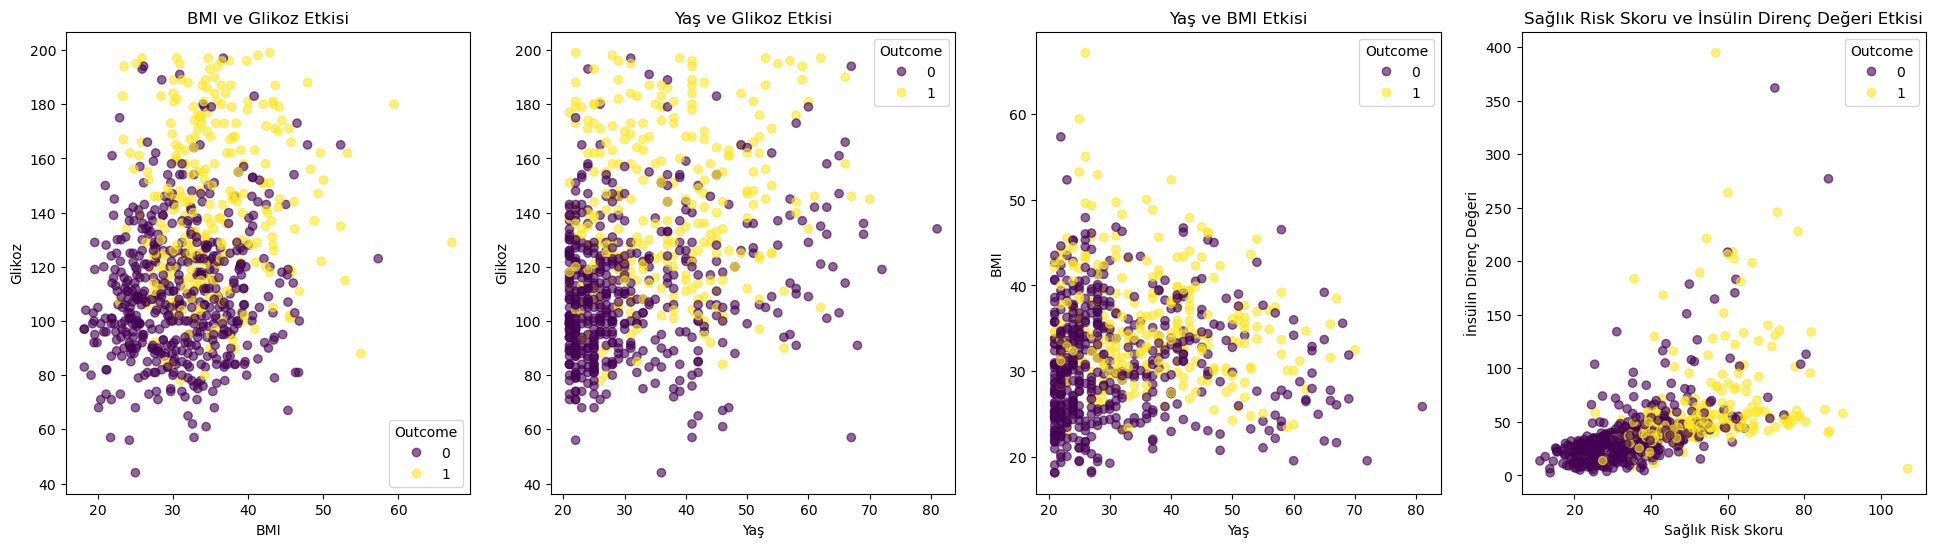

In [555]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6)) 
scatter = ax1.scatter(df["BMI"], df["Glucose"], c=df["Outcome"], alpha=0.6)
legend1 = ax1.legend(*scatter.legend_elements(), title="Outcome")
ax1.set_title("BMI ve Glikoz Etkisi")
ax1.set_xlabel("BMI")
ax1.set_ylabel("Glikoz")

scatter = ax2.scatter(df["Age"], df["Glucose"], c=df["Outcome"], alpha=0.6)
legend1 = ax2.legend(*scatter.legend_elements(), title="Outcome")
ax2.set_title("Yaş ve Glikoz Etkisi")
ax2.set_xlabel("Yaş")
ax2.set_ylabel("Glikoz")

scatter = ax3.scatter(df["Age"], df["BMI"], c=df["Outcome"], alpha=0.6)
legend1 = ax3.legend(*scatter.legend_elements(), title="Outcome")
ax3.set_title("Yaş ve BMI Etkisi")
ax3.set_xlabel("Yaş")
ax3.set_ylabel("BMI")

scatter = ax4.scatter(df["Sağlık Risk Skoru"], df["İnsülin Direnç Değeri"], c=df["Outcome"], alpha=0.6)
legend1 = ax4.legend(*scatter.legend_elements(), title="Outcome")
ax4.set_title("Sağlık Risk Skoru ve İnsülin Direnç Değeri Etkisi")
ax4.set_xlabel("Sağlık Risk Skoru")
ax4.set_ylabel("İnsülin Direnç Değeri")

# Özelliklerin hedef değişkenle olan ilişkisini gözlemlemek için görselleştirme işlemi yapıldı. Grafiklerin daha güzel olması amacıyla standartlaştırma işlemi bu adımdan sonra yapıldı.

In [556]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop(["Outcome", "DiabetesPedigreeFunction", "Pregnancies"])

print(numeric_cols)

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

display(df.head())
display(df.describe())

# Veri setindeki sayısal değerler standartlaştırıldı.

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age',
       'Sağlık Risk Skoru', 'İnsülin Direnç Değeri'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sağlık Risk Skoru,İnsülin Direnç Değeri,Kan Basıncı Kategorisi
0,6,0.865108,-0.033518,0.670643,-0.181541,0.160517,0.627,1.425995,1,0.660743,0.018140,1
1,1,-1.206162,-0.529859,-0.012301,-0.181541,-0.854968,0.351,-0.190672,0,-1.185009,-0.488881,0
2,8,2.015813,-0.695306,-0.012301,-0.181541,-1.333696,0.672,-0.105584,1,0.178239,0.299818,0
3,1,-1.074652,-0.529859,-0.695245,-0.540642,-0.637364,0.167,-1.041549,0,-1.021724,-0.634323,0
4,0,0.503458,-2.680669,0.670643,0.316566,1.538674,2.288,-0.020496,1,1.295029,0.308896,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sağlık Risk Skoru,İnsülin Direnç Değeri
count,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,768.000000,7.680000e+02,7.680000e+02
mean,3.845052,-3.561966e-16,6.915764e-16,-1.526557e-16,1.503427e-17,9.228729e-16,0.471876,1.931325e-16,0.348958,-2.266705e-16,3.284410e-16
std,3.369578,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.331329,1.000652e+00,0.476951,1.000652e+00,1.000652e+00
min,0.000000,-2.554131e+00,-4.004245e+00,-2.516429e+00,-1.467353e+00,-2.073549e+00,0.078000,-1.041549e+00,0.000000,-1.975229e+00,-1.107285e+00
25%,1.000000,-7.212214e-01,-6.953060e-01,-4.675972e-01,-2.220849e-01,-7.244054e-01,0.243750,-7.862862e-01,0.000000,-7.304627e-01,-4.647370e-01
50%,3.000000,-1.540881e-01,-1.675912e-02,-1.230129e-02,-1.815412e-01,-1.356624e-02,0.372500,-3.608474e-01,0.000000,-1.502024e-01,-2.244252e-01
75%,6.000000,6.103090e-01,6.282695e-01,3.291706e-01,-1.554775e-01,5.957245e-01,0.626250,6.602056e-01,1.000000,5.591578e-01,1.066674e-01
max,17.000000,2.541850e+00,4.102655e+00,7.955377e+00,8.170442e+00,5.020336e+00,2.420000,4.063716e+00,1.000000,4.553443e+00,9.121594e+00


In [557]:
df = pd.get_dummies(df, columns=["Kan Basıncı Kategorisi"], prefix="Kan_Basıncı")
df[["Kan_Basıncı_0", "Kan_Basıncı_1", "Kan_Basıncı_2"]] = df[["Kan_Basıncı_0", "Kan_Basıncı_1", "Kan_Basıncı_2"]].astype(int)
display(df.head())

# Kan Basıncı Kategorisi özelliği için one-hot encoding işlemi yapıldı.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sağlık Risk Skoru,İnsülin Direnç Değeri,Kan_Basıncı_0,Kan_Basıncı_1,Kan_Basıncı_2
0,6,0.865108,-0.033518,0.670643,-0.181541,0.160517,0.627,1.425995,1,0.660743,0.018140,0,1,0
1,1,-1.206162,-0.529859,-0.012301,-0.181541,-0.854968,0.351,-0.190672,0,-1.185009,-0.488881,1,0,0
2,8,2.015813,-0.695306,-0.012301,-0.181541,-1.333696,0.672,-0.105584,1,0.178239,0.299818,1,0,0
3,1,-1.074652,-0.529859,-0.695245,-0.540642,-0.637364,0.167,-1.041549,0,-1.021724,-0.634323,1,0,0
4,0,0.503458,-2.680669,0.670643,0.316566,1.538674,2.288,-0.020496,1,1.295029,0.308896,0,1,0


Outcome                     1.000000
Sağlık Risk Skoru           0.519523
Glucose                     0.492928
BMI                         0.310071
İnsülin Direnç Değeri       0.286375
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Kan_Basıncı_2               0.126193
Kan_Basıncı_1               0.076331
Kan_Basıncı_0              -0.153398
Name: Outcome, dtype: float64


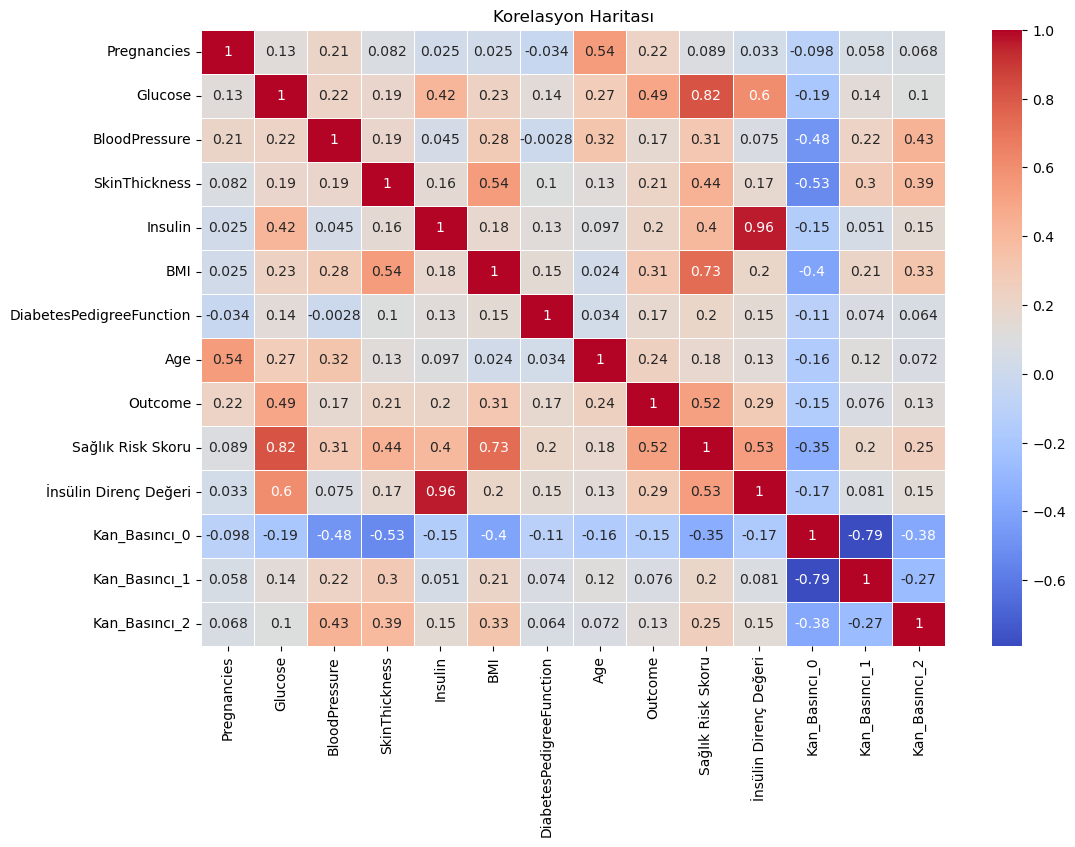

In [558]:
correlation_matrix = df.corr()

print(correlation_matrix.sort_values(by="Outcome", ascending=False)["Outcome"])

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasyon Haritası")
plt.show()

df.drop(["BloodPressure", "DiabetesPedigreeFunction"], axis=1, inplace=True)

# Bağımsız değişkenlerin sahip olduğu ilişkiye bakıldı ve gereksiz özellikler veri setinden çıkarıldı. 

In [559]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols = numeric_cols.drop("Outcome")
X = df[numeric_cols]
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf_model = RandomForestClassifier(n_estimators=160, random_state=0, max_leaf_nodes=15)
rf_model.fit(X_train, y_train)

y_predict = rf_model.predict(X_test)

accuracy=accuracy_score(y_test,y_predict)
print("Accuracy : ",round(accuracy,2)*100,'%')

# Random Forest sınıflandırma modeli oluşturuldu ve modelin başarısı ölçüldü.

Accuracy :  81.0 %


In [560]:
Y=df['Outcome']
X=df.drop('Outcome',axis=1)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
lg = model.predict(X_test)

accuracy=accuracy_score(y_test,lg)
print("Accuracy : ",round(accuracy,2)*100,'%')

# Logistic Regression sınıflandırma modeli oluşturuldu ve modelin başarısı ölçüldü.

Accuracy :  81.0 %
